# Rational Expectations and Markov Perfect Equilibrium

Undergraduate Computational Macro

Jesse Perla (University of British Columbia)

# Overview

## Motivation

-   We have been studying many problems where agents use their
    expectations of the future to make decisions today
-   But what is the feedback between those decisions, expectations, and
    the actual outcomes?
-   This lecture introduces the concept of **rational expectations
    equilibrium** and **Markov perfect equilibrium** to study this
    feedback
-   To illustrate it, we describe a linear quadratic version of a famous
    and important model due to [Lucas and Prescott
    1971](https://julia.quantecon.org/zreferences.html#id103)

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Rational Expectations
        Equilibrium](https://julia.quantecon.org/multi_agent_models/rational_expectations.html)
    -   [Markov Perfect
        Equilibrium](https://julia.quantecon.org/multi_agent_models/markov_perf.html)

In [2]:
using LinearAlgebra, Statistics
using Distributions, LaTeXStrings, QuantEcon
using Plots.PlotMeasures, NLsolve, Roots, Random, Plots
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Perceived and Actual Laws of Motion

## Recall: Rational Expectations

-   In [previous
    lectures](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/models-of-expectations)
    we discussed models for how agents’ form expectations
-   Our key approach was to use the [mathematical
    expectation](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/using-the-mathematical-expectation)
    to formalize how agents’ use expectations of the future to make
    decisions today
    -   e.g. , $\mathbb{E}_t[X_{t+j}]$ where $X_{t+j}$ is a random
        variable forecast by agents given (precisely defined)
        [information
        sets](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/information-sets)
        at time $t$
-   It was often convenient to write down models with Markov random
    variables so that $X_{t+1}$ only depended on $X_t$ and not
    $X_{t-1}$, etc.
-   If we assumed that agents’ were using the best possible forecasts
    given the information they had, we called this **rational
    expectations**
    -   Key feature: **rational expectations** forecasts are not
        [systematically
        biased](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/systematic-bias-in-forecasts)

## Microfoundations, Decisions, and Expectations

-   We took those tools to take agents’ forecasts of some stochastic
    process and solve for their decisions
-   A core insight of modern macroeconomics is that in order to evaluate
    changes in policy you need to have some self-consistent model of
    behavior (what we call **microfoundations**)
-   These give us a tool to understand **counterfactuals** of how an
    agent would respond to changes in the environment (e.g., [endogenous
    savings in the Permanent Income
    Model](https://jlperla.github.io/ECON408/lectures/permanent_income.html#/exogenous-vs.-endogenous-savings))
-   If we take as given the stochastic processes that agents use to form
    expectations (e.g., paths of prices such as interest rates) we can
    evaluate how changes to that environment will change the decisions
    of agents

## Decisions and Outcomes

-   But what if the stochastic process is a consequence of those
    decisions?
-   e.g. there are agents’ $i = 1, \ldots I$ each with a state $X^i_t$
    and a decision that affects each individuals payoffs, then agent $i$
    must forecast the entire distribution of $X^j_{t+1}$ for $j \neq i$
    to make their decision
    -   This, in turn, requires them to know the decision rules of those
        agents
-   Sometimes this can be simplified since “payoff relevant” (i.e.,
    things that enter individual decisions) are summarized by prices
    like interest rates, future wages, etc.
-   Keep in mind that the true evolution of $X^j_{t+1}$ will depend on
    the decisions of all agents $j = 1, \ldots I$, so if we consider
    policy changes that affect decisions, it would change the evolution
    of $X^j_{t+1}$

## Example: Capital Accumulation

-   For example, consider savings decisions in a [growth
    model](https://jlperla.github.io/ECON408/lectures/deterministic_dynamics.html#/solow-model-dynamics)
-   As we saw, the rate of savings by consumers will determine the rate
    of capital accumulation
-   But in a competitive market, the return to capital will depend on
    the amount of capital in the economy
-   From the consumers’ perspective, they will make decisions based on
    the returns to capital, which are a price like an interest rate
-   In order to make optimal savings decisions they then need to
    forecast the future capital stock (or interest rates), which in turn
    are a consequence of those savings

## Example: Education and Wages

-   Or another example, consider how much education (or other human
    capital) a consumer should acquire
-   When making human capital decisions, students try to predict future
    wages for different levels of education
-   But those wages depend on the supply of workers with a given level
    of education
    -   So in some ways they need to forecast the decisions of other
        students to make their own decisions - which could be used to
        forecast the wages
-   To consider policy counterfactuals large enough to change to
    education distribution (and wages) we need students to be able to
    forecast how other students will respond to those changes

## Example: Asset Pricing

-   Our classic [consumption-based asset
    pricing](https://jlperla.github.io/ECON408/lectures/asset_pricing_lucas_trees.html#/aggregate-endowment-and-complete-markets)
    results are similar
-   Part of the decision on the price of an asset today is the expected
    future price of that asset
    -   But that price was determined by the decisions of all other
        agents!
-   We considered the case where the pricing was self-consistent (easy
    in that case because we assumed a large number of identical agents)
    -   We solved a version with endowments (i.e. stochastic process
        $c_t$ in fixed supply) but if production or other decisions
        entered, then agents’ would have needed to predict them to make
        their decisions

## Example: Firm Investment

-   A classic example comes from Lucas and Prescott (1971) where firms
    make investment decisions
-   To determine the appropriate scale of a firm, firms need to forecast
    profits
-   But prices and profits depend on the scale of all firms in the
    economy
    -   The market clearing price is decreasing in the total output of
        all firms
    -   Which in turn depends on the investment decisions
-   So firms’ need to forecast the decisions of all other firms (or, at
    least, forecast the prices) to make their own investment decision

## Expectations and Outcomes

-   If you consider counterfactuals which are unlikely to change
    aggregates (and hence prices) much, then this feedback isn’t a
    problem
    -   i.e., **partial equilibrium** analysis which is fine for many
        questions
-   But if not, then this feedback is especially challenging because it
    relies on **expectations** of the future
-   This is at the heart of why macroeconomics is theoretically and
    computationally challenging
    -   It also forces you to take a stand on models of expectations
-   Without assumptions, you may end up with internally inconsistencies
    (e.g., agents’ forecasts of prices are based on an evolution of the
    economy that is inconsistent with those decisions)

# Equilibrium Concepts

## Rational Expectations Equilibrium

-   A classic benchmark which preserves this self-consistency is the
    **rational expectations equilibrium** (REE)

    1.  Agents’ make decisions today using **rational expectations** to
        forecast the future - and taking as given the stochastic process
        of the evolution of the aggregate state/etc.
    2.  Given those decisions, solve for the actual evolution of the
        aggregate state
    3.  The equilibria is that the perceived and actual laws of motion
        are the same (i.e., *fixed-point between the perceived and
        actual laws of motion*)

-   As with rational expectations, agents do not know the future
    exactly, but forecast given the information they have and to have no
    systematic biases

## Markov Perfect Equilibrium

-   This is a special case of another equilibrium concept called
    **Markov Perfect Equilibrium** (MPE) or Markov Perfect Nash
    Equilibrium
-   In that, we make the same basic assumptions but consider strategic
    interactions between agents
    -   e.g., in a Nash equilibrium, if I change my strategy today it
        will change the aggregate state, which will change the
        strategies of other agents
    -   e.g., if I change my output, I am big enough to affect the
        aggregates
-   With a smaller number of agents (e.g., 3 firms completing) MPE is
    more appropriate - but in the limit they converge
-   Intuitively: as soon as the actions of each agent end up having a
    very small affect on payoff relevant functions of the the aggregate
    state (e.g., prices) then the MPE and REE are often the same

## Aggregates and Representative Agents

-   REE are typically used with **price-taking** agents (i.e.,
    competitive equilibrium)
-   With many competitive equilibria, the distribution is not important,
    and the aggregate state is sufficient to calculate “payoffs”
-   e.g., a firm may only need to know the total amount of output of
    competitive firms, not the distribution of output
-   If we do not need to solve for the evolution of the distribution,
    then we may be able to assume conditions such that a
    **representative agent** can be used to solve the model. Aggregation
    result (not assumption)
    -   The easiest examples are often with **homothetic** and identical
        production processes and preferences

## The “Big K, little k” trick

-   The self-consistency between the perceived and actual laws of motion
    is easiest to see work with when all firms are identical and
    price-taking
-   Classic example: Lucas and Prescott (1971) model of firm investment
    -   The perceived law of motion is of the aggregate $K$, capital
    -   The individual firm chooses investment $k$ to maximize profits
    -   The REE is when the perceived law of motion is the same as the
        actual law of motion (i.e. $K = N k$ for $N$ identical firms)
    -   If all we care about are dynamics of the aggregate $K$ then we
        might as well just use a single representative firm
-   Pervasive technique in macro: often called the “Big K, little k”
    trick

# Simple Example

## Static Example

-   To demonstrate the approach, lets first consider a simple static
    example
-   There is an undifferentiated good produced by $n=1,\ldots N$ firms
    sold on a competitive market for $p$
-   $N$ firms each face cost to produce with $y$ units of output $$
    c(y) = c_1 y + \frac{N}{2} c_2 y^2
    $$
    -   (Scaling by $N$ is a hack to make things closer to homothetic)
-   If firms are identical, then define the aggregate output
    $Y \equiv \sum_{n=1}^N y_n = N y$
    -   Where the last equality is only true if all firms are identical

## Demand and Price

-   Since the good is undifferentiated, and if we assume that prices are
    determined by the aggregate supply and demand, we can summarize
    demand as an inverse-demand function

    $$
    p(Y) \equiv a_0 - a_1 \sum_{n=1}^N y_n = a_0 - a_1 Y
    $$

    -   Where $a_0$ and $a_1$ are parameters
    -   Note that this is a function of the **aggregate** output

## Profit Maximization for REE

-   Taking prices $p(Y)$ and the perceived output of the other firms
    ($Y$) as given the firm solves

    $$
    \max_{y} \left\{ p(Y) y - c(y) \right\}
    $$

    -   Crucially, the $Y$ and the $y$ are different here! The $Y$ is
        their perceived output level in the industry, and $y$ is the
        firms’ chosen output level  
    -   Here we are thinking that the firm is sufficiently small, or
        non-strategic, such that it doesn’t consider its own impact on
        the price

## Take the FOC First, Apply REE Second

-   Take the problem with the cost and prices

    $$
    \max_{y} \left\{ (a_0 - a_1 Y) y - c_1 y - \frac{N}{2}c_2 y^2 \right\}
    $$

-   Take the FOC with respect to the $y$. Don’t touch the $Y$! They take
    it as given

    $$
      a_0 - a_1 Y - c_1 - c_2 N y = 0
      $$

-   Finally, to impose the REE we have that $Y = N y$ so that

    $$
    a_0 - a_1 Y - c_1 - c_2 Y = 0
    $$

    -   Or that $Y = \frac{a_0 - c_1}{a_1 + c_2}$. Why not just use
        $N=1$?

## Nash Equilibrium-Style Solutions

-   The MPE/Nash equivalent in this case would be if the firm considers
    that its own output will affect the price

-   In particular, firm $n$ forecasts $y_j$ for all $j \neq n$ and then
    solves

    $$
    \max_{y_n} \left\{ p\left(\sum_{j\neq n}y_j + y_n \right)y_n - c(y_n) \right\}
    $$

    -   Which requires considering the impact of $\partial_{y_n} p(Y)$
        in their decision
    -   Then an symmetric MPE is one in which the $y_n$ are all the same
        and fulfill that equation

-   With large $N$, $\partial_{y_n} p(Y) \approx 0$ and an REE is a good
    approximation

# Dynamic Firm Investment Model

## Competitive Equilibria with Adjustment Costs

-   Maintain capital = output for now. Just trying to make the
    -   $y^n_t$ for $n=1,\ldots N$ firms
    -   $Y_t = \sum_{n=1}^N y^n_t$, aggregate output
-   Homogenous good sold at price $p(Y) = a_0 - a_1 Y$
-   Firms are profit maximizing **price takers** discounting at rate
    $\beta$

## Adjustment Costs

-   While they have no uncertainty, it is costly to adjust their output
-   The cost of adjusting output is quadratic in the change in output $$
    c(y_{t+1} - y_t) = \frac{1}{2} \gamma (y_{t+1} - y_t)^2
    $$
    -   Where $\gamma > 0$ is a parameter
-   Since they own the capital to produce, we will ignore other marginal
    production costs. Normalizing

## Forecasting the Aggregates

-   The challenge faced by the firm is that$p_t$ depend on aggregate
    output $Y_t$, will drop and perhaps even go negative
-   So if they over produce and choose too high of a $y_t$ then may end
    up with lower or negative profits
-   The REE challenge is that all other firms are making that decision,
    so $Y_t$ is a function of all the $y_t$’s
-   We could have them forecast $p_t$ directly, but note that
    $p_t = p(Y_t)$ so we can have them forecast a law of motion for
    $Y_t$ instead

## Firm Beliefs

-   The agents have a deterministic **perceived law of motion** for
    $Y_t$

    -   More generally, we would need a stochastic process for the
        perceived law of motion of $Y_t$.

-   Given the known initial condition $Y_0$, define this as

    $$
    Y_{t+1} = H(Y_t)
    $$

-   This belief $H(\cdot)$ is an equilibrium object we will solve for

    -   The next step is to take it as given, and solve the firm’s
        problem

## Sequential Firm Problem (Given Beliefs)

-   Take $H(\cdot)$ **as given** and generate $Y_t$ from $H(\cdot)$ and
    $Y_0$

-   Firm period profits net adjustment costs are
    $p(Y_t) y_t - c(y_{t+1}, y_t)$

-   The firm takes prices, $y_0, Y_0$ and given, and solves $$
      \max_{\{y_{t+1}\}_{t=0}^{\infty}} \left\{\sum_{t=0}^{\infty}\left(p(Y_t) y_t - c(y_{t+1}, y_t)\right)\right\}
    $$

    -   Turns out we can write solution as a $y_{t+1} = h(y_t, Y_t)$ in
        this case.

## Firm Problem (Given Beliefs)

-   Jumping to a Bellman Equation with value function: $v(y,Y)$

-   The state: $y$ for the firm, and $Y$ for the aggregate. Take
    $H(\cdot)$ **as given**

    $$
    \begin{aligned}
    v(y,Y) &= \max_{y'} \left\{ p(Y) y  - c(y', y) + \beta v(y', H(Y))\right\}\\
    &= \max_{y'} \left\{ a_0 y - a_1 y Y - \frac{ \gamma (y' - y)^2}{2}   + \beta v(y', H(Y))\right\}
    \end{aligned}
    $$

    -   Define the solution to the optimization problem as the
        $\arg\max$, and denote $y' = h(y,Y)$

-   Note that $v(y,Y)$ and $h(y,Y)$ would depend on the $H(Y)$

## (Optional) First-Order Characterization of $h$

-   Take the FONC, then $$
    -\gamma (y' - y) + \beta v_y(y',H(Y)) =0
    $$

    -   As in [asset
        pricing](https://jlperla.github.io/ECON408/lectures/asset_pricing_lucas_trees.html#/euler-equation)
        we need to use the envelope theorem, following a result of
        [Benveniste-Scheinkman
        (1979)](https://julia.quantecon.org/zreferences.html#id66)
    -   Gives that $v_y(y,Y) = a_0 - a_1 Y + \gamma (y' - y)$

-   Substituting this equation gives $$
    -\gamma (y_{t+1} - y_t) + \beta [a_0 - a_1 Y_{t+1} + \gamma (y_{t+2} - y_{t+1} )] =0
    $$

    -   with initial conditions for $(y_0, Y_0)$
    -   the terminal **transversality condition**
        $\lim_{t \rightarrow \infty } \beta^t y_t v_y(y_{t}, Y_t) = 0$

## Imposing the REE Equilibrium

-   Given a solution for the $y_{t+1} = h(y_t, Y_t)$, we can then impose
    the REE equilibrium $$
    \begin{aligned}
    Y_{t+1} &= H(Y_t)\\
     &= N  h(Y_t/N, Y_t)
    \end{aligned}
    $$
-   In this case, can show that the $Y_t$ evolution will be independent
    of $N$
-   Might as well set $N=1$ then set $Y_t = y_t$ to solve for the
    equilibrium
    -   i.e. $h(Y_t, Y_t) = H(Y_t)$, or the actual LOM = perceived LOM
    -   The “Big K, little k” trick. But can’t do $Y_t = y_t$ until
        **after** FOCs

# Computing the REE

## Solution Methods

-   This fixed point problem connecting the perceived and actual laws of
    motion is computationally challenging
    -   Internally we can fix a LOM and then solve the agent’s problem,
        but then we need to find the new LOM given those decisions
    -   We can literally set it up as a fixed-point problem, but it
        isn’t a [contraction
        mapping](https://julia.quantecon.org/multi_agent_models/rational_expectations.html#misbehavior-of-phi)
        so naive iteration won’t always work.
-   In some cases we can find a [planning
    problem](https://julia.quantecon.org/multi_agent_models/rational_expectations.html#a-planning-problem-approach)
    with the same solution
-   Here we will discuss the general approach without going through the
    computational challenges and solutions

## Outline of Algorithm

1.  Choose a functional form for the LOM. In this case, we will guess
    that $$
     Y_{t+1} = H(Y_t) = \kappa_0 + \kappa_1 Y_t
     $$

2.  Then, for some $\kappa_0$ and $\kappa_1$ guess, we solve the firm’s
    problem taking the $H(Y_t)$ as given

    -   This gives us a
        $y_{t+1} = h(y_t, Y_t) = h_0 + h_1 y_t + h_2 Y_t$ in this case

3.  Use the $N=1$ example, and set $Y_t = y_t$ and find the implied
    $\kappa_0$ and $\kappa_1$

    $$
    \begin{aligned}
    Y_{t+1} &= H(Y_t) = \kappa_0 + \kappa_1 Y_t\\
    N y_{t+1} &= N h(y_t, Y_t) = N h_0 + N h_1 y_t + N h_2 Y_t
      \end{aligned}
    $$

4.  Applying the simple $N=1$ case we have $y_t = Y_t$ which means that

    $$
    \kappa_0 + \kappa_1 Y_t = h_0 + h_1 Y_t + h_2 Y_t
    $$

5.  Iterate until $\kappa_0 \approx h_0$ and
    $\kappa_1 \approx h_1 + h_2$

## Linear Quadratic Optimal Control

-   This problem fits into the [Linear Quadratic (LQ) optimal
    control](https://julia.quantecon.org/dynamic_programming/lqcontrol.html)
    framework $$
    \begin{aligned}
    \max_{\{u_t\}_{t=0}^{\infty}} &\sum_{t=0}^{\infty}\beta^t \left(x_t^{\top} R x_t + u_t^{\top} Q u_t\right)\\
    &\text{s.t. } x_{t+1} = A x_t + B u_t
    \end{aligned}
    $$
    -   Where $x_t$ is a state vector, $u_t$ is a control vector, and
        $R, Q$ are matrices for payofffs
    -   The $x_{t+1} = A x_t + B u_t$ is a LSS law of motion. Also can
        handle gaussian shocks
-   Can show optimal solution is a $u_t = - F x_t$ for some $F$ matrix

## Fitting the LQ Law of Motion

-   **If** the perceived law of motion is
    $Y_{t+1} = H(Y_t) = \kappa_0 + \kappa_1 Y_t$ this fits the LSS

-   Let $x_t \equiv \begin{bmatrix} y_t & Y_t & 1\end{bmatrix}^{\top}$

-   Let $u_t \equiv y_{t+1} - y_t$, i.e. scalarchange in output

    $$
    \underbrace{\begin{bmatrix} y_{t+1} \\ Y_{t+1} \\ 1\end{bmatrix}}_{\equiv x_{t+1}} = \underbrace{\begin{bmatrix}
      1 & 0 & 0 \\
      0 & \kappa_1 & \kappa_0 \\
      0 & 0 & 1
    \end{bmatrix}}_{\equiv A} \underbrace{\begin{bmatrix} y_t \\ Y_t \\ 1\end{bmatrix}}_{\equiv x_t} + \underbrace{\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}}_{\equiv B} u_t
    $$

## Fitting the LQ Payoffs

-   Payoffs in our model are $$
    p(Y_t) y_t - c(y_{t+1}, y_t) = a_0 y_t - a_1 y_t Y_t - \frac{ \gamma (y_{t+1} - y_t)^2}{2}
    $$

-   Mapping to the LQ setup

    $$  
    = \underbrace{\begin{bmatrix} y_t & Y_t & 1\end{bmatrix}}_{\equiv x_t^{\top}} \underbrace{\begin{bmatrix}
      0 & a_1/2 & -a_0/2 \\
      a_1/2 & 0 & 0 \\
      -a_0/2 & 0 & 0
      \end{bmatrix}}_{\equiv R} \underbrace{\begin{bmatrix} y_t \\ Y_t \\ 1\end{bmatrix}}_{\equiv x_t} + u_t^{\top} \underbrace{\begin{bmatrix} \gamma / 2\end{bmatrix}}_{\equiv Q} u_t
    $$

## Mapping Solution to $h$ and $H$

-   LQ optimal control gives an optimal $u_t = - F x_t$

-   For our $u_t$ and $x_t$,

    $$
    \begin{aligned}
    u_t &= y_{t+1} - y_t = - F_1 y_t - F_2 Y_t - F_3\\
    y_{t+1} &= (1-F_1) y_t - F_2 Y_t - F_3\\
    \end{aligned}
    $$

-   Let $y_t = Y_t$ to apply REE condition for $N=1$ $$
    Y_{t+1} = - F_3 + (1-F_1 - F_2) Y_t \equiv \hat{\kappa}_0 + \hat{\kappa}_1 Y_t
    $$

-   Compare to the assumed $H$ LOM to solve

    $$
    Y_{t+1} = H(Y_t) = \kappa_0 + \kappa_1 Y_t
    $$

## Implementation of Firm Problem (Given Beliefs)

In [3]:
function solve_firm_problem(kappa, mod)
  kappa_0, kappa_1 = kappa # beliefs for H(Y_t)
  (; a_0, a_1, gamma, beta) = mod
  A = [1 0 0
      0 kappa_1 kappa_0
      0 0 1]
  B = [1.0, 0.0, 0.0]
  R = [0 a_1/2 -a_0/2
      a_1/2 0 0
      -a_0/2 0 0]
  Q = gamma/2
  lq = QuantEcon.LQ(Q, R, A, B; bet = beta)  # Package solves for u_t = -F x_t
  P, F, d = stationary_values(lq)
  kappa_0_hat = -F[3]
  kappa_1_hat = 1 - F[1] - F[2]
  return [kappa_0_hat, kappa_1_hat] # implied h(Y_t, Y_t)
end

## Rational Expectations Equilibria

-   Key: find fixed point of $H(Y) = h(Y, Y)$
-   Note that naive fixed-point iteration may not work

In [4]:
function solve_REE(mod; kappa_iv = [95.5, 0.95], Y_ss_iv = [1500.0])
  sol = fixedpoint(kappa -> solve_firm_problem(kappa, mod), kappa_iv)
  kappa_0, kappa_1 = sol.zero
  H(Y) = [kappa_0 + kappa_1 * Y[1]] # vectorized
  Y_ss = fixedpoint(Y -> H(Y), Y_ss_iv).zero # steady state of H(Y)
  return (;kappa_0, kappa_1, H, Y_ss)
end

## Finding the Fixed Point of H = h

In [5]:
firm_dynamics_model(;a_0 = 100, a_1 = 0.05, beta = 0.95, gamma = 10.0) = (;a_0, a_1, beta, gamma)
kappa_iv = [95.5, 0.95] # H() belief initial condition
mod = firm_dynamics_model() # default values
kappa_hat = solve_firm_problem(kappa_iv, mod)
(;kappa_0, kappa_1, H, Y_ss) = solve_REE(mod; kappa_iv)
@show solve_firm_problem([kappa_0, kappa_1], mod) - [kappa_0, kappa_1];

solve_firm_problem([kappa_0, kappa_1], mod) - [kappa_0, kappa_1] = [1.7195134205394424e-12, 1.1102230246251565e-15]

## REE Dynamics


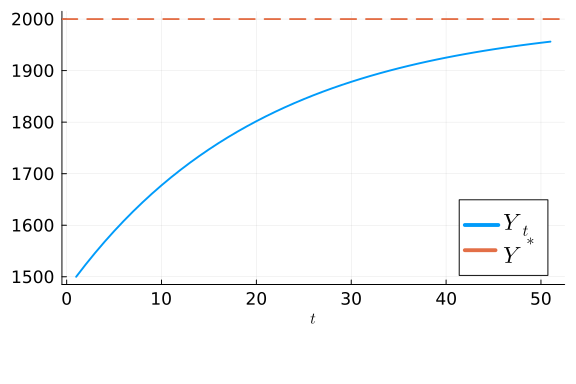

In [6]:
function iterate_map(f, x0, T)
    x = zeros(length(x0), T + 1)
    x[:, 1] = x0
    for t in 2:(T + 1)
        x[:, t] = f(x[:, t - 1])
    end
    return x
end
(;H, Y_ss) = solve_REE(mod)
Y_0 = [1500.0]
T = 50
Y_path = iterate_map(H, Y_0, T) # H 
plot(Y_path'; label = L"Y_t", xlabel = L"t",
     size = (600, 400), legend = :bottomright)
hline!([Y_ss[1]]; label = L"Y^*",
       linestyle=:dash)

## Counterfactual


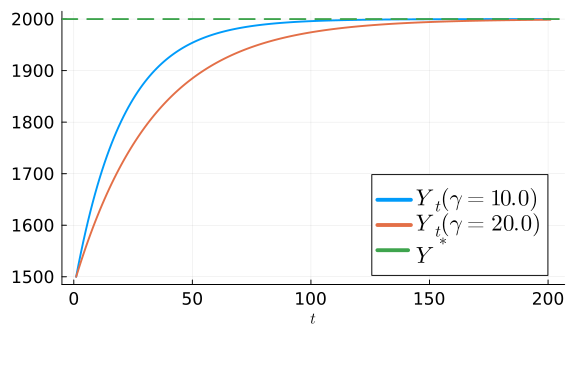

In [7]:
(;H, Y_ss) = solve_REE(mod)
Y_0 = [1500.0]
T = 200
Y_path = iterate_map(H, Y_0, T)
plot(Y_path'; label = L"Y_t(\gamma = 10.0)",
     xlabel = L"t", size = (600, 400),
     legend = :bottomright)
mod = firm_dynamics_model(;gamma = 20.0)
(;H, Y_ss) = solve_REE(mod)
Y_path = iterate_map(H, Y_0, T)
plot!(Y_path'; label = L"Y_t(\gamma = 20.0)")
hline!([Y_ss[1]]; label = L"Y^*",
       linestyle=:dash)